# Importing Packages and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import model_selection
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import normalize
from sklearn.cross_validation import cross_val_score

#Stop warnings
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = pd.read_csv('Clothing_Store.csv')

In [3]:
# Encoding Valid Phone Number variable numerically
dummies = pd.get_dummies(data[['VALPHON']],  drop_first=True)
data = data.join(dummies)
del data['VALPHON']

In [4]:
pd.set_option('max_columns', 51)
data.describe().round(3)

,HHKEY,ZIP_CODE,REC,FRE,MON,CC_CARD,AVRG,PC_CALC20,PSWEATERS,PKNIT_TOPS,PKNIT_DRES,PBLOUSES,PJACKETS,PCAR_PNTS,PCAS_PNTS,PSHIRTS,PDRESSES,PSUITS,POUTERWEAR,PJEWELRY,PFASHION,PLEGWEAR,PCOLLSPND,AMSPEND,PSSPEND,CCSPEND,AXSPEND,TMONSPEND,OMONSPEND,SMONSPEND,PREVPD,GMP,PROMOS,DAYS,FREDAYS,MARKDOWN,CLASSES,COUPONS,STYLES,STORES,STORELOY,WEB,MAILED,RESPONDED,RESPONSERATE,HI,LTFREDAY,CLUSTYPE,PERCRET,RESP,VALPHON_Y
count,2.174000e+04,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000
mean,9.955672e+12,48935.216,126.966,5.064,472.888,0.384,113.889,12.572,0.214,0.027,0.041,0.093,0.136,0.086,0.069,0.066,0.068,0.034,0.018,0.010,0.030,0.013,0.073,14.218,147.822,286.852,24.257,90.008,31.991,222.472,41.669,0.522,11.577,437.630,170.853,0.187,7.146,0.750,17.205,2.340,2116.290,0.042,4.673,1.194,17.277,37.889,80.240,15.107,0.131,0.166,0.860
std,5.195910e+08,24086.449,104.738,6.420,640.051,0.486,87.250,2.461,0.230,0.069,0.110,0.136,0.183,0.140,0.132,0.117,0.157,0.131,0.100,0.037,0.078,0.050,0.174,149.864,395.139,441.461,113.856,184.616,97.164,362.774,108.107,0.142,7.142,192.902,146.172,0.129,5.346,1.673,24.616,1.603,1806.105,0.200,3.547,1.829,24.543,28.150,78.730,12.214,0.557,0.372,0.347
min,9.955600e+12,0.000,1.000,1.000,0.990,0.000,0.490,11.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.010,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,1.000,1.000,3.000,0.000,0.000,0.000,0.000,0.050,0.090,0.000,0.000,0.000,0.000
25%,9.955616e+12,30339.000,35.000,1.000,135.605,0.000,60.990,11.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,78.000,0.000,0.000,0.000,0.000,0.000,0.460,5.000,287.000,67.000,0.090,3.000,0.000,5.000,1.000,337.000,0.000,1.000,0.000,0.000,18.410,24.958,5.000,0.000,0.000,1.000
50%,9.955628e+12,48335.000,98.000,3.000,263.490,0.000,92.070,11.000,0.160,0.000,0.000,0.050,0.040,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,147.600,0.000,0.000,0.000,108.000,0.000,0.550,12.000,447.000,124.000,0.180,6.000,0.000,9.000,2.000,1670.000,0.000,4.000,0.000,0.000,29.520,52.000,11.000,0.000,0.000,1.000
75%,9.955639e+12,66707.000,206.000,6.000,569.000,1.000,139.505,16.000,0.310,0.030,0.030,0.140,0.230,0.130,0.090,0.100,0.060,0.000,0.000,0.000,0.030,0.004,0.030,0.000,127.938,321.942,0.000,109.992,0.000,287.572,0.000,0.620,17.000,630.000,230.000,0.280,10.000,1.000,20.000,3.000,4176.000,0.000,8.000,2.000,30.000,50.000,107.000,22.000,0.090,0.000,1.000
max,9.964401e+12,99687.000,365.000,115.000,22511.490,1.000,1919.880,19.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,10642.720,11476.800,22511.490,4099.920,5562.460,2189.000,13224.070,2259.500,0.990,38.000,713.000,713.000,0.950,37.000,32.000,743.000,19.000,7504.000,1.000,11.000,11.000,100.000,200.000,364.000,50.000,40.920,1.000,1.000


# Business Understanding

In [5]:
y = ['RESP']

drop = ['HHKEY', 'PC_CALC20']
# customer id, unknown variable

categorical = ['ZIP_CODE', 'CLUSTYPE']
# zip code, market cluster

discrete = ['REC', 'FRE', 'PROMOS', 'DAYS', 'CLASSES', 'COUPONS', 'STYLES', 'STORES', 'MAILED', 'RESPONDED', 'STORELOY']
# visits, purchase visits, promos on file, days on file,
# diff product classes purchased, coupons used by cust, diff styles purchased,
# stores cust has shopped in, promos mailed in last yr promos responded in last yr

binary = ['CC_CARD', 'VALPHON_Y', 'WEB']
# CC owned, valid phone number on file, shopped on web

continuous = ['MON', 'AVRG', 'TMONSPEND', 'OMONSPEND', 'SMONSPEND', 'PREVPD', 'FREDAYS', 'LTFREDAY',
              'AMSPEND', 'PSSPEND', 'CCSPEND', 'AXSPEND']
# total spent, average spent per visit, three month, one month, six month, amt spent in same period last yr,
# days between purchases in last yr, days between purchases over lifetime
# amount spent at each franchise (x4)

fractions = ['GMP', 'MARKDOWN', 'RESPONSERATE', 'HI', 'PERCRET',
             'PSWEATERS', 'PKNIT_TOPS', 'PKNIT_DRES', 'PBLOUSES',
             'PJACKETS', 'PCAR_PNTS', 'PCAS_PNTS', 'PSHIRTS', 'PDRESSES', 'PSUITS',
             'POUTERWEAR', 'PJEWELRY', 'PFASHION', 'PLEGWEAR', 'PCOLLSPND']
# gross margin percentage, markdown percentage of customer purchases, 0-100% promotion response rate,
# product uniformity (low is spending diversity), percent of returns
# items x15

Predictors have been grouped by datatype above.

In [6]:
data.shape

(21740, 51)

There are 50 predictors for 21740 customers.

In [7]:
print("Mean amount spent by customer %.2f"%data['AVRG'].mean())
print("Median amount spent by customer %.2f"%data['AVRG'].median())
print("Skewness of the amount spent by customer is %.2f"%data['AVRG'].skew())

Mean amount spent by customer 113.89
Median amount spent by customer 92.07
Skewness of the amount spent by customer is 3.51


Mean amount of money spent by typical customer is \$114 whilst median was \$92. Due to data being positively skewed (mean greater than median), we decide to take the average amount spent by a customer was \$92. We assume profit is 15% of this, so profit made for each successful customer who is sent mail and responds, is \$14

In [8]:
data['AVRG'].describe()

count    21740.000000
mean       113.889105
std         87.249794
min          0.490000
25%         60.990000
50%         92.070000
75%        139.505000
max       1919.880000
Name: AVRG, dtype: float64

# Data Understanding
**(Exploratory Data Analysis)**

In [9]:
# Missing data
missing_data = data.isnull().sum(axis=0).reset_index()
missing_data.columns = ['Predictor', 'Count of NaN values']
missing_data['Missing Ratio'] = missing_data['Count of NaN values'] / data.shape[0]
missing_data.loc[missing_data['Missing Ratio'] > 0]

,Predictor,Count of NaN values,Missing Ratio


No missing data to worry about

In [10]:
# Percentage of Responces
data['RESP'].value_counts(normalize=True).round(3)*100

0    83.4
1    16.6
Name: RESP, dtype: float64

Issue here since in dataset, only 16.6% of observations actually responded to marketing campain. We have a massive class imbalance here. It will be difficult to obtain a good score for the sensitivity as a result.

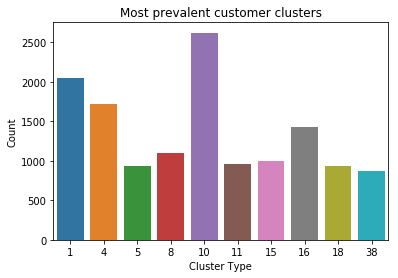

In [11]:
# Cluster variable which tells us what kind of customer (segment) they are from
clust_type_count = data['CLUSTYPE'].value_counts()
ax = sns.barplot(x =clust_type_count.index[:10], y= clust_type_count[:10])
ax.set(xlabel='Cluster Type', ylabel='Count', title="Most prevalent customer clusters")
plt.show()

Cluster 10 (home sweet home) is the most prevalent life style cluster in our data set (based on Microvision Market Segmentation System). These are families with medium-high income. Appears customer tends to be rich families that are hihgly educated.

In [12]:
# Testing for skewness in all features (aware that you can't test skewness in binary)
import scipy

columns = list(data.columns)

skewed = []
non_skewed = []

for i in columns:
    p = scipy.stats.skewtest(data[i], nan_policy='omit')[1] # calculates p_value (H0 = sample is from normally distributed pop)
    if p < 0.01:
        skewed.append(i)
    else:
        non_skewed.append(i)

non_skewed

['ZIP_CODE']

Looks like everything is skewed, since zip code doesn't count

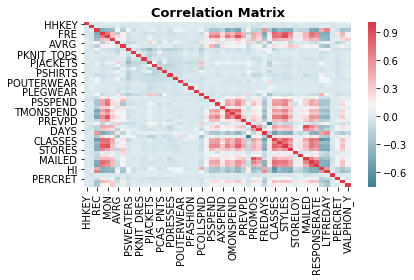

In [13]:
# Correlation matrix
fig, ax = plt.subplots()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data.corr(), ax=ax, cmap=cmap)
ax.set_title('Correlation Matrix', fontweight='bold', fontsize=13)

plt.tight_layout()
plt.show()

In [14]:
# Lists correlation pairs with absolute value of 0.75 or greater
columns = list(data.columns)
corr = pd.DataFrame(data.corr()) # Below requires correlation values in a table

high_corr = np.where(np.abs(corr) >= 0.75) # Chose 0.75 arbitrarily
high_corr = [(corr.columns[x], corr.columns[y]) for x, y in zip(*high_corr) if x != y and x < y]

high_corr

[('FRE', 'CLASSES'),
 ('FRE', 'STYLES'),
 ('FRE', 'RESPONDED'),
 ('MON', 'SMONSPEND'),
 ('MON', 'CLASSES'),
 ('MON', 'STYLES'),
 ('TMONSPEND', 'SMONSPEND'),
 ('SMONSPEND', 'STYLES'),
 ('GMP', 'MARKDOWN'),
 ('PROMOS', 'MAILED'),
 ('CLASSES', 'STYLES'),
 ('RESPONDED', 'RESPONSERATE')]

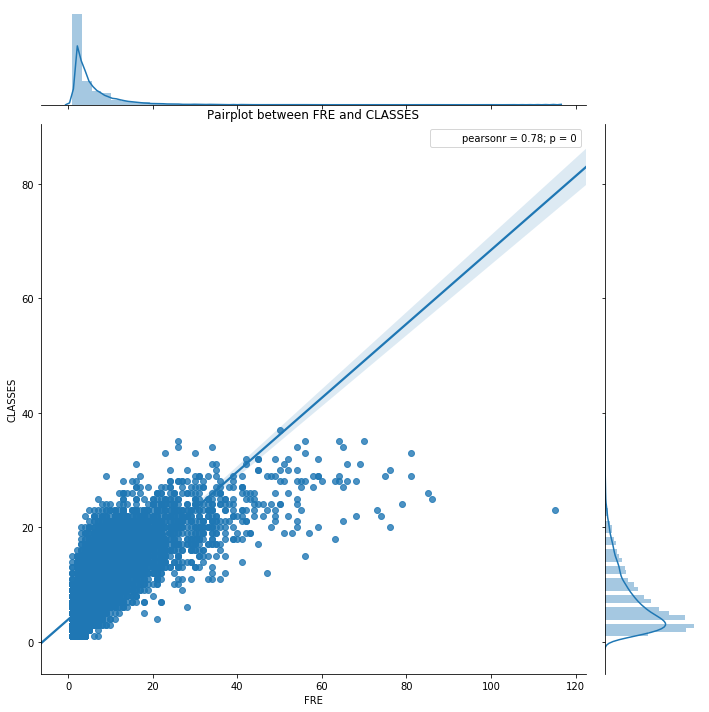

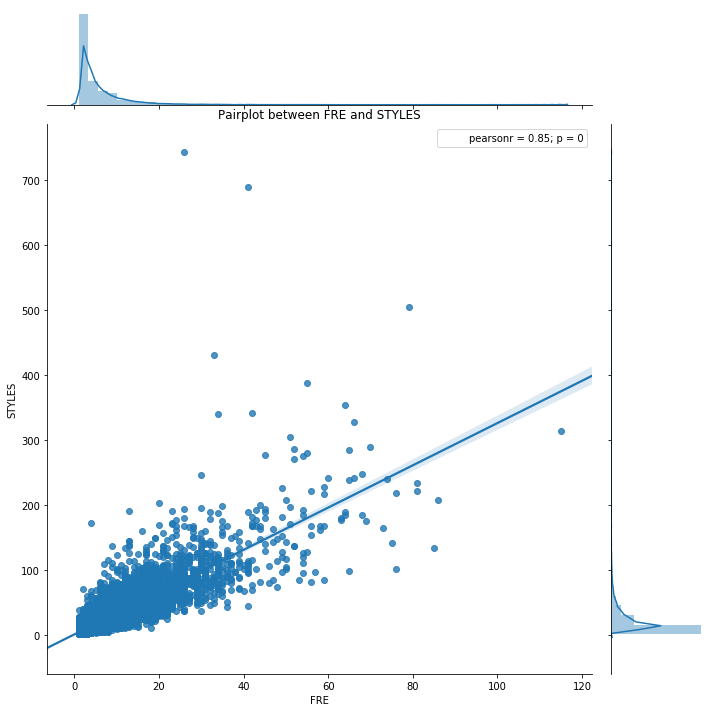

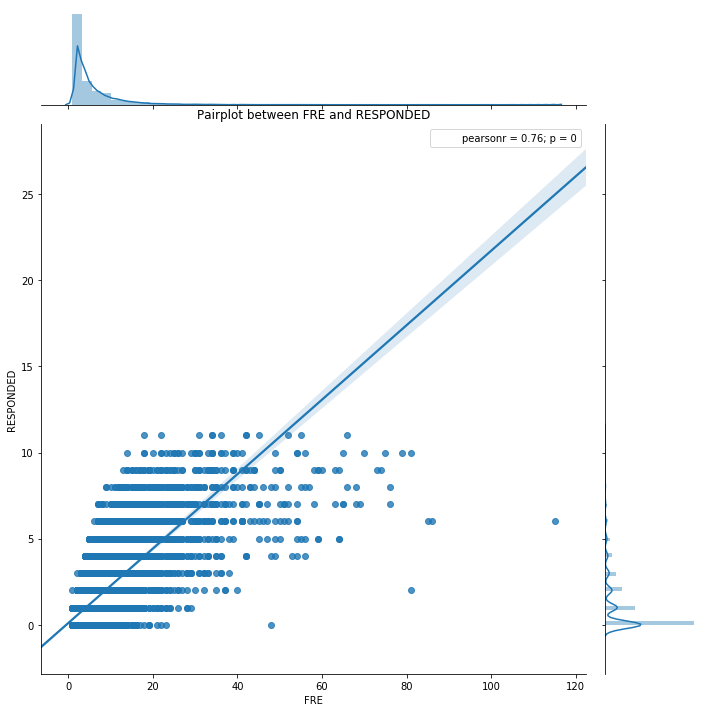

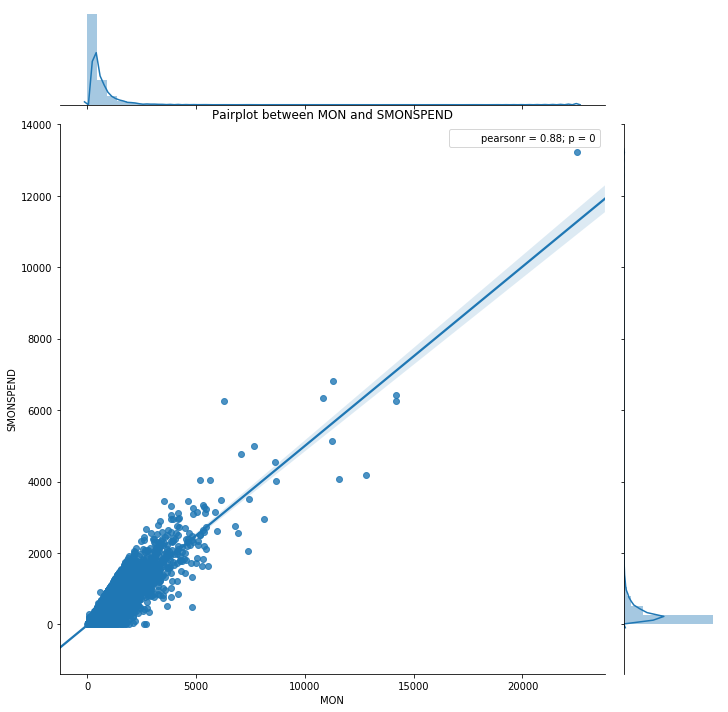

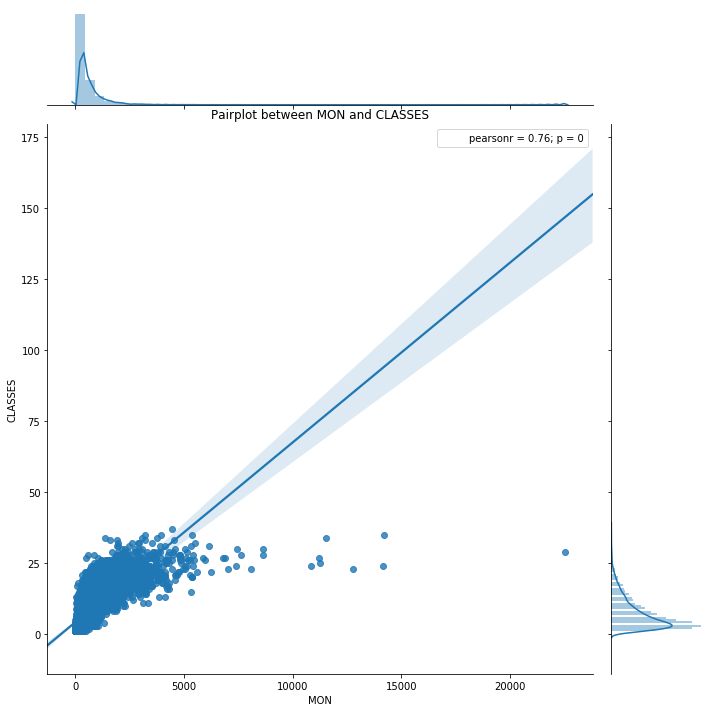

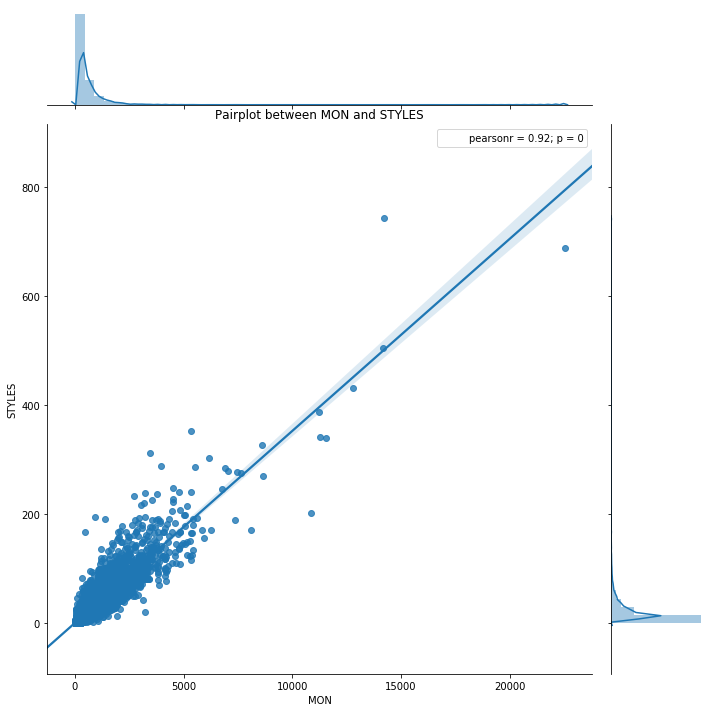

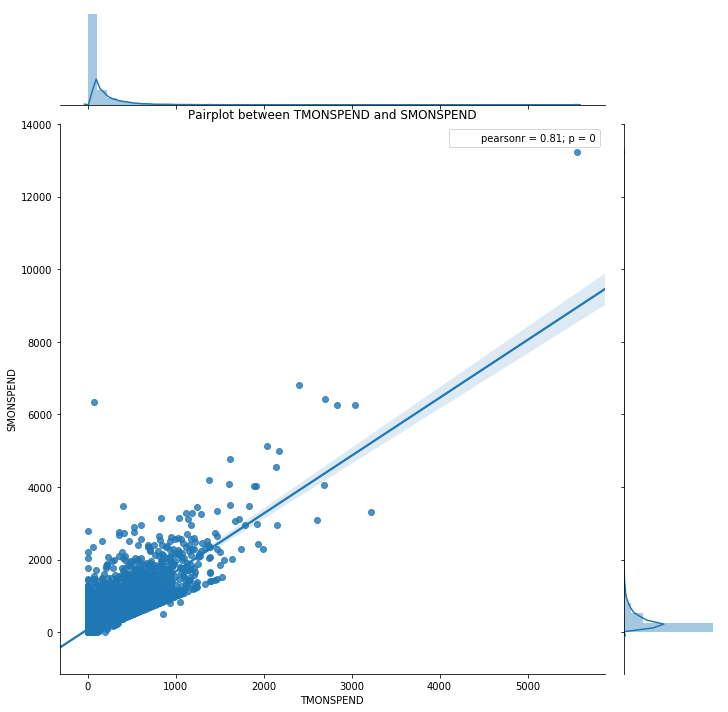

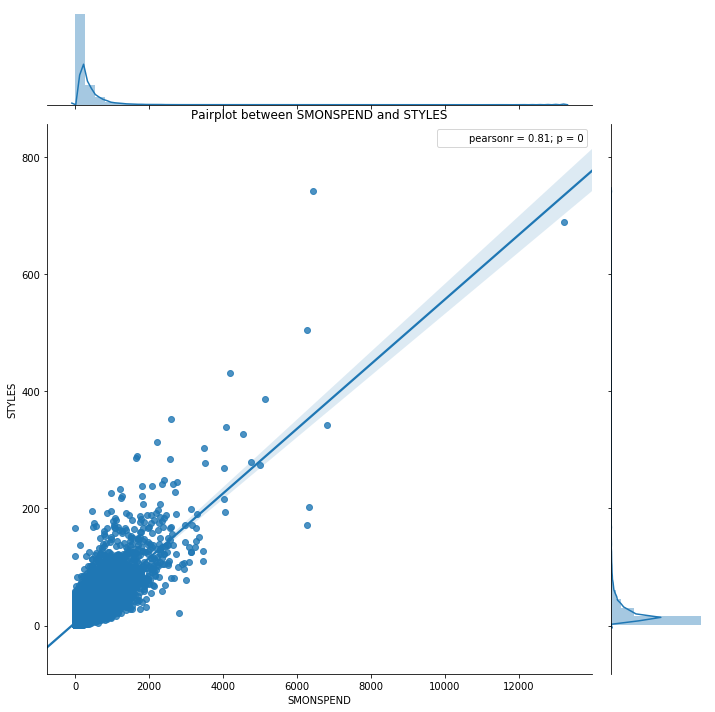

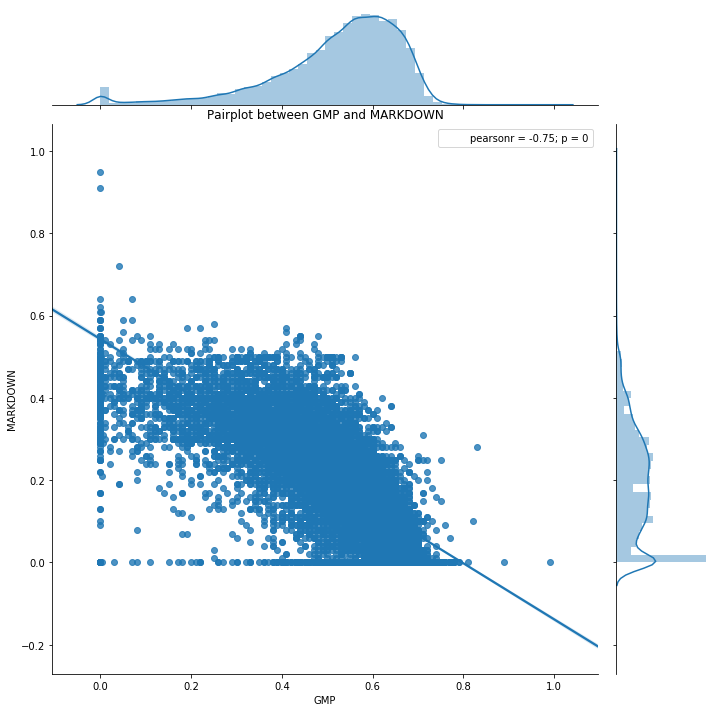

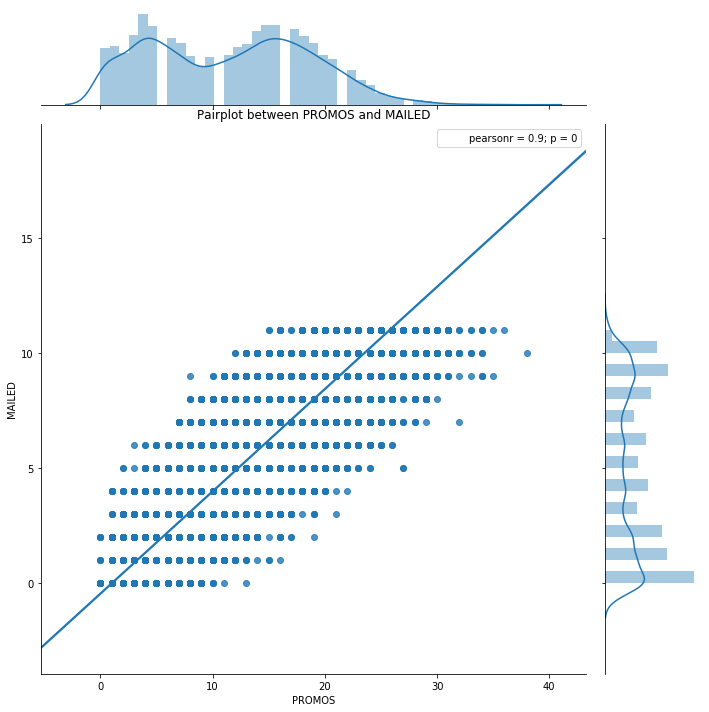

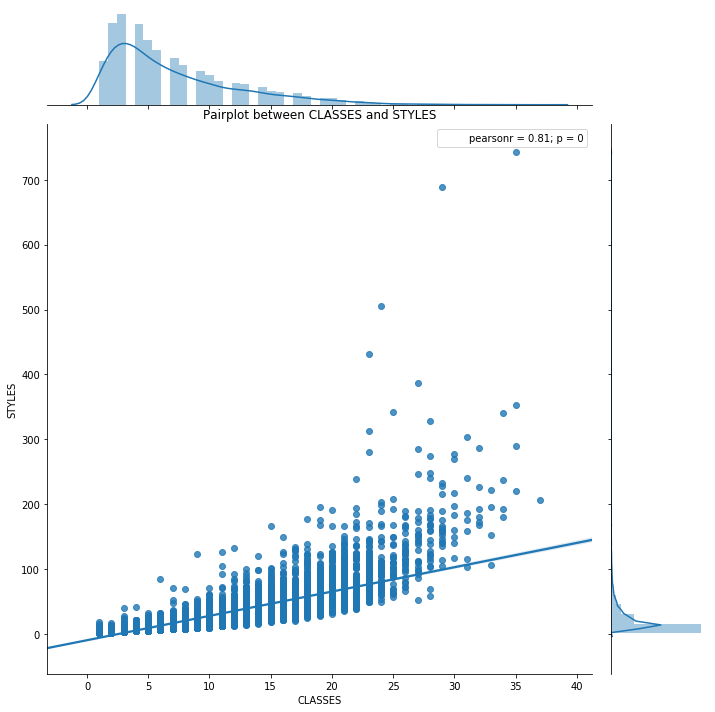

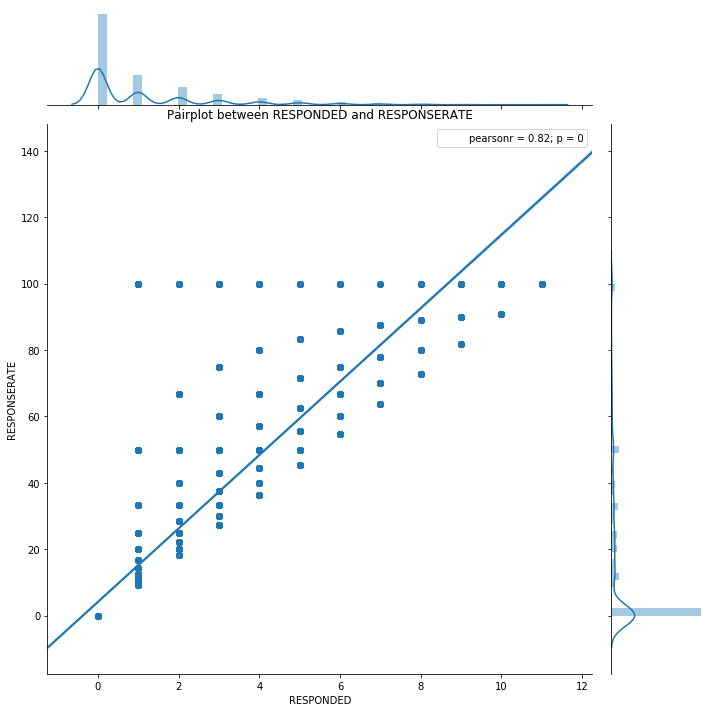

In [15]:
# Pairplots for high correlation pairs (based on above)
for i in high_corr:
    fig = sns.jointplot(x=data[i[0]], y=data[i[1]], kind='reg', size=10)
    plt.title('Pairplot between ' + str(i[0]) + ' and ' + str(i[1]))
    plt.show()

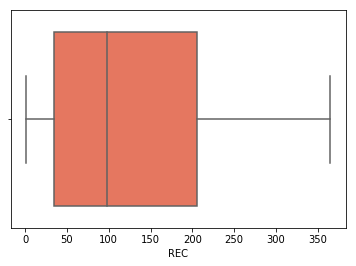

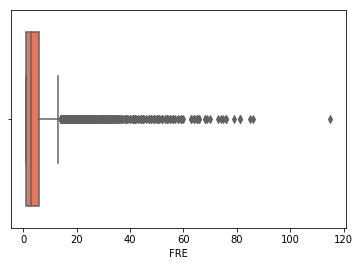

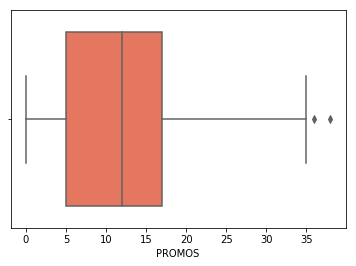

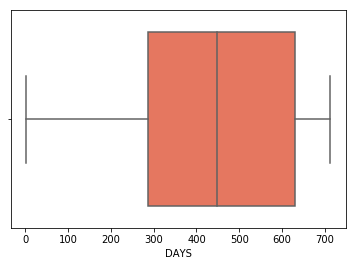

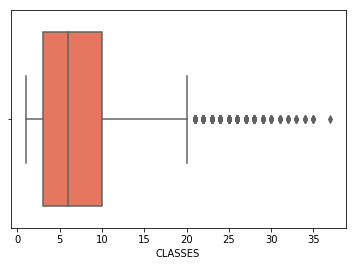

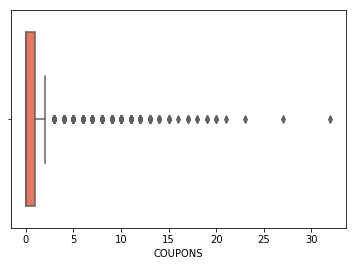

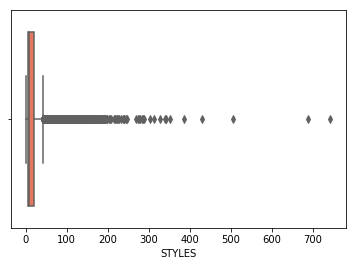

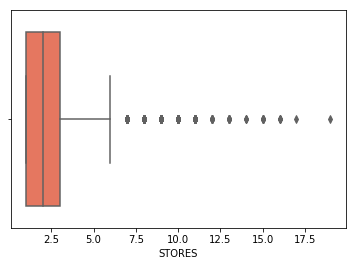

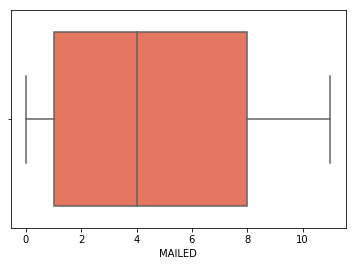

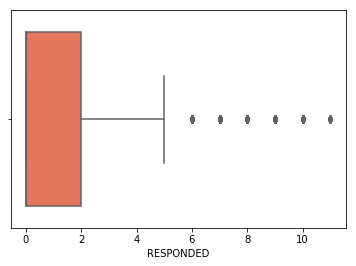

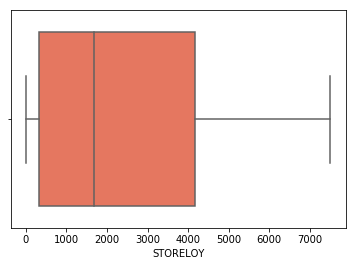

In [16]:
# Boxplot for discrete variables
for i in discrete: 
    fig, ax = plt.subplots()
    sns.boxplot(x=i, data=data, orient='h', palette='Reds')
    plt.show()

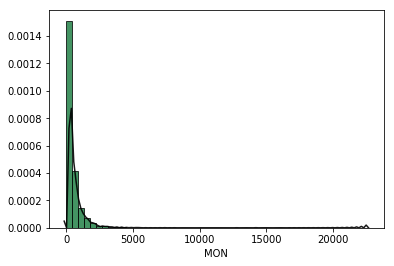

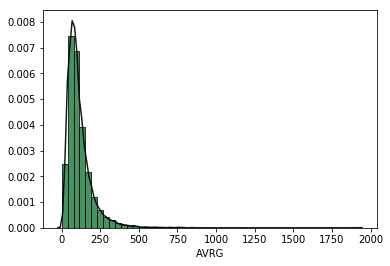

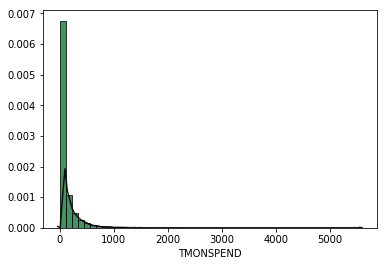

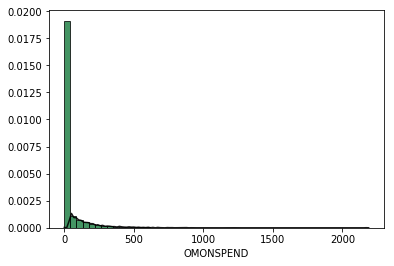

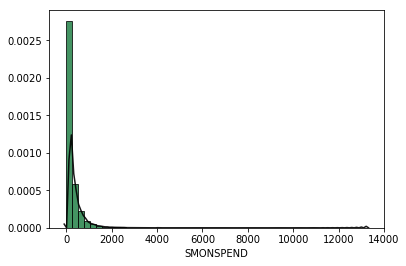

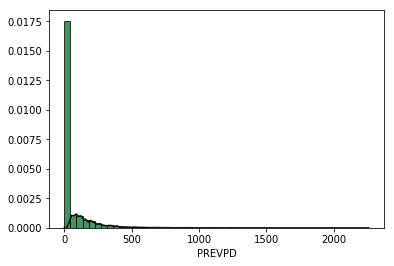

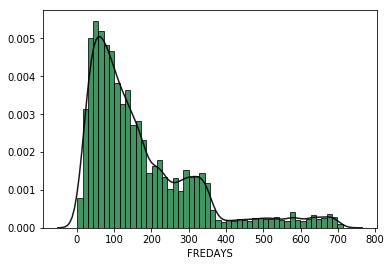

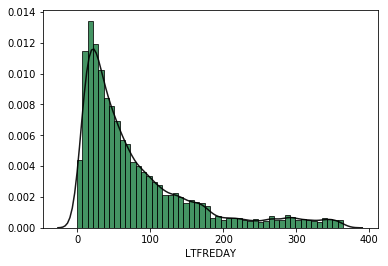

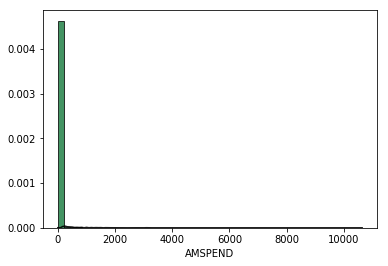

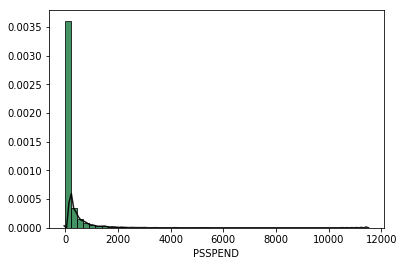

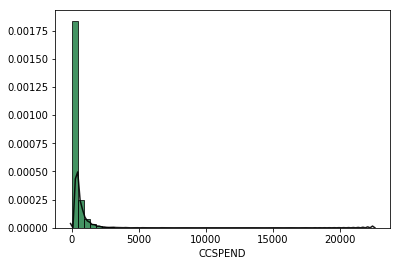

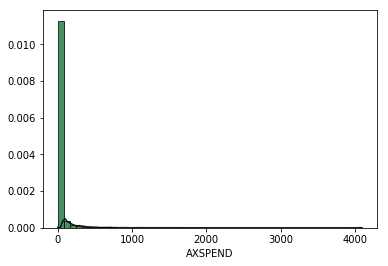

In [17]:
# Histogram for continuous variables
def hist(series):
    fig, ax = plt.subplots()
    sns.distplot(series, ax=ax,
                 hist_kws={'alpha': 0.75,
                           'edgecolor':'black',
                           'color': sns.color_palette('Greens')[-1]},  
                 kde_kws={'color': 'black', 'alpha': 0.9})
    return plt.show()

for i in continuous:
    hist(data[i])

Several variables seem to have outliers - will need to be addressed

In [18]:
# Pivot table between cluster type and several features
pivot = pd.pivot_table(data, values=['FRE','DAYS','RESPONDED'], columns='CLUSTYPE')
pivot.round(3)

CLUSTYPE,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
DAYS,419.143,450.339,451.590,445.973,448.295,441.656,438.805,437.306,441.675,458.207,446.103,436.917,425.479,412.925,420.468,435.187,437.782,389.260,435.463,405.778,443.275,406.087,453.094,428.074,437.203,444.786,433.615,432.429,424.467,405.859,418.861,473.150,413.437,485.333,408.382,415.493,432.548,406.478,424.025,447.908,402.005,421.202,402.405,404.419,426.00,398.218,445.695,410.24,421.32,400.250,429.452
FRE,4.857,5.144,5.888,5.242,5.099,5.339,4.700,4.553,4.933,3.862,5.319,5.037,4.576,5.088,4.064,5.420,4.919,4.745,5.306,7.444,4.612,4.609,5.112,5.089,4.735,5.276,4.154,5.857,4.389,3.766,4.322,4.300,5.346,4.333,4.091,5.458,6.161,4.507,4.808,5.956,4.422,4.828,4.091,3.710,1.25,4.750,5.298,2.52,3.92,2.812,5.195
RESPONDED,1.029,1.254,1.478,1.269,1.286,1.246,1.142,1.041,1.159,1.103,1.313,1.229,1.042,1.088,0.737,1.198,1.187,1.000,1.274,1.444,1.092,0.739,1.133,1.261,0.986,1.196,0.846,1.095,0.977,0.781,0.957,1.075,1.078,1.667,1.000,1.206,1.161,0.970,1.041,1.480,0.843,1.141,0.950,0.677,0.00,1.016,1.156,0.52,0.96,0.375,1.175


In [19]:
# Cross table between response and whether customer rsponded to mailing previously
crosstab = pd.crosstab(data['RESP'],data['RESPONDED'])
crosstab

RESPONDED,0,1,2,3,4,5,6,7,8,9,10,11
RESP,,,,,,,,,,,,
0,10816,3300,1754,925,560,373,204,96,58,29,12,2
1,894,613,518,455,345,262,200,139,92,55,28,10


In [20]:
# Proportions for table above
crosstab = (crosstab/crosstab.sum()).round(3)
crosstab

RESPONDED,0,1,2,3,4,5,6,7,8,9,10,11
RESP,,,,,,,,,,,,
0,0.924,0.843,0.772,0.67,0.619,0.587,0.505,0.409,0.387,0.345,0.3,0.167
1,0.076,0.157,0.228,0.33,0.381,0.413,0.495,0.591,0.613,0.655,0.7,0.833


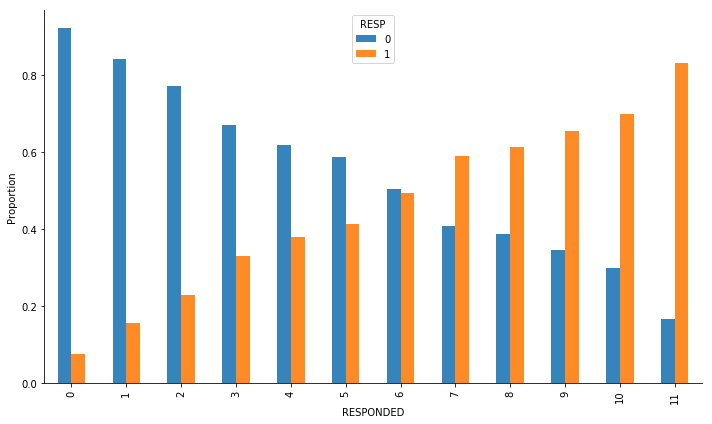

In [21]:
# Table based on above
fig, ax = plt.subplots(figsize=(10,6))
(crosstab.T).plot(kind='bar', alpha=0.9, ax=ax)
ax.set_xlabel('RESPONDED')
ax.set_ylabel('Proportion')
ax.legend_.set_title('RESP')
plt.tight_layout()
sns.despine()
plt.show()

In [22]:
data['ZIP_CODE'].value_counts().head()

55125    51
15601    42
62301    38
60089    38
60187    36
Name: ZIP_CODE, dtype: int64

Looks like zip code can be dropped. Way too many clusters with nothing really possible for encoding, except binning. If geographical information was available based on zip codes though, that could help.

In [23]:
data['CLUSTYPE'].value_counts().head(10)

10    2623
1     2054
4     1719
16    1431
8     1094
15    1002
11     964
18     938
5      931
38     873
Name: CLUSTYPE, dtype: int64

Top 10 cluster types make up high proportion. Can consider encoding first 9, and 10th and beyond all together as Other.

**EDA Tests:**

In [24]:
from scipy import stats

# Non-parametric Kruskal-Wallis ANOVA rank test - discrete variables
H = []
p = []

for i in discrete:
    h, pval = stats.kruskal(*[data.loc[data[i]==v,'RESP'] for v in data[i].unique()])
    H.append(h)
    p.append(pval)

# Calculates significance at 1% and appends results
test_results = []
for value in p:
    if value < 0.01:
        test_results.append('True')
    else:
        test_results.append('False')

# Creates tables with the values above
table = pd.DataFrame(H, columns = ['H Stat'], index = discrete)
table['p values'] = pd.DataFrame(p, index = discrete)
table['Reject, \u03b1=0.01'] = pd.DataFrame(test_results, index = discrete)

table.round(2)

,H Stat,p values,"Reject, α=0.01"
REC,2202.13,0.0,True
FRE,4096.08,0.0,True
PROMOS,1313.31,0.0,True
DAYS,1600.12,0.0,True
CLASSES,3077.12,0.0,True
COUPONS,2395.66,0.0,True
STYLES,3820.81,0.0,True
STORES,2042.75,0.0,True
MAILED,1093.56,0.0,True
RESPONDED,2698.85,0.0,True


In [25]:
# Same test as above, for binary and categorical variables
H = []
p = []

for i in binary:
    h, pval = stats.kruskal(*[data.loc[data[i]==v,'RESP'] for v in data[i].unique()])
    H.append(h)
    p.append(pval)

test_results = []
for value in p:
    if value < 0.01:
        test_results.append('True')
    else:
        test_results.append('False')

table = pd.DataFrame(H, columns = ['H Stat'], index = binary)
table['p values'] = pd.DataFrame(p, index = binary)
table['Reject, \u03b1=0.01'] = pd.DataFrame(test_results, index = binary)

table.round(2)

,H Stat,p values,"Reject, α=0.01"
CC_CARD,1265.24,0.0,True
VALPHON_Y,236.33,0.0,True
WEB,555.28,0.0,True


There is significant evidence to reject H0 that medians are different for these variables in determining response

In [26]:
# Variance Inflation Factor calculations for multicollinearity - excluding binary (bc it doesn't work)
from statsmodels.stats.outliers_influence import variance_inflation_factor

pred = discrete + continuous + fractions

X = data[pred].as_matrix()
VIF = pd.DataFrame([np.sqrt(variance_inflation_factor(X,j)) for j in range(len(pred))], index=pred, columns=['SQRT(VIF)'])

VIF.sort_values(by='SQRT(VIF)', ascending=False).round(2).head(10)

,SQRT(VIF)
MON,167.34
CCSPEND,110.65
PSSPEND,88.71
AMSPEND,31.66
AXSPEND,24.49
GMP,5.05
STYLES,4.89
PROMOS,4.71
MAILED,4.37
DAYS,4.28


Multicollinearity for top 5 - needs to be addressed

# Data Preparation
**(Feature Engineering)**

### Transformations

In [27]:
data['LOG_MON'] = np.log(data['MON'])
data['POWER_MON'] = scipy.stats.boxcox(data['MON'])[0]

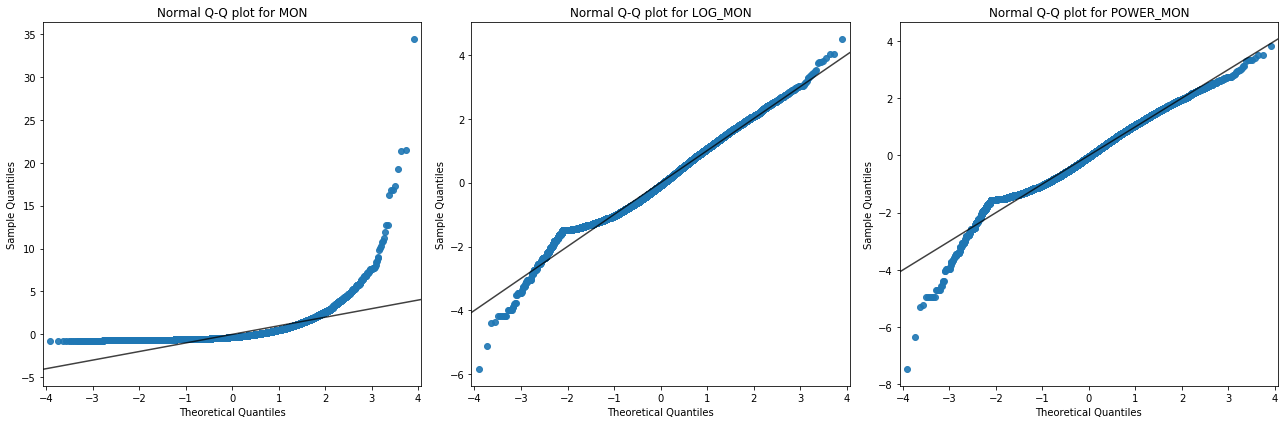

In [28]:
# Comparison of the original and two transformed series on Q-Q plot
import statsmodels.api as sm

label = ['MON', 'LOG_MON', 'POWER_MON']

fig, ax = plt.subplots(1,3, figsize=(18,6))
i=0
for series in label:
    pp = sm.ProbPlot(data[series], fit=True)
    qq = pp.qqplot(color=sns.color_palette()[0], alpha=0.9, ax=ax[i])
    a = ax[i].get_xlim()[0]
    b = ax[i].get_xlim()[1]
    ax[i].plot([a,b],[a,b], color='black', alpha=0.75)
    ax[i].set_xlim(a,b)
    ax[i].set_title('Normal Q-Q plot for {}'.format(series))
    i+=1

plt.tight_layout()
plt.show()

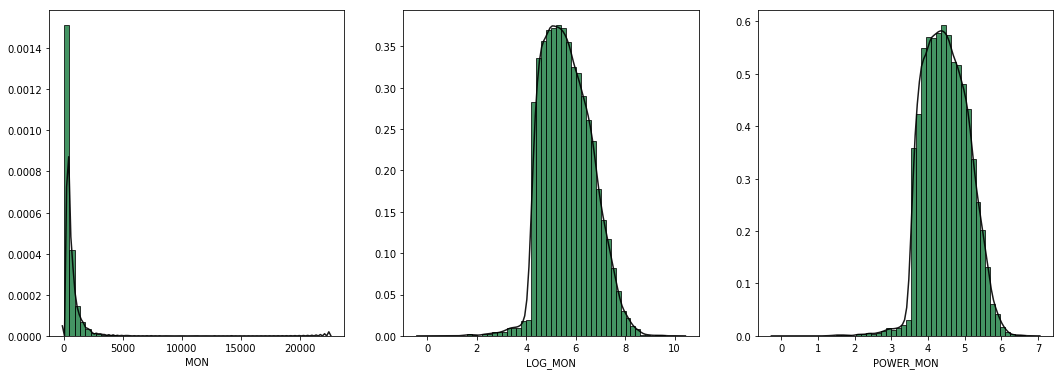

In [29]:
# Comparison of the original and two transformed series
label = ['MON', 'LOG_MON', 'POWER_MON']

fig, ax = plt.subplots(1,3, figsize=(18,6))
i=0
for series in label:
    sns.distplot(data[series], ax=ax[i],
             hist_kws={'alpha': 0.75, 'edgecolor':'black', 'color': sns.color_palette('Greens')[-1]},
                 kde_kws={'color': 'black', 'alpha': 0.9})
    i+=1

plt.show()

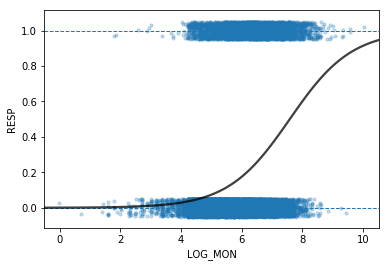

In [30]:
# Plotting the transformed money spent against response with Logit
fig, ax = plt.subplots()

ax.axhline(0.0, linestyle='--', linewidth=1)
ax.axhline(1.0, linestyle='--', linewidth=1)

sns.regplot(data['LOG_MON'], data['RESP'], ax=ax, ci=None, logistic=True, y_jitter=0.05, 
            scatter_kws={'s': 10, 'alpha': 0.25}, line_kws={'alpha': 0.75, 'color': 'black'})

ax.set_xlabel('LOG_MON')
ax.set_ylabel('RESP')

plt.show()

After assessing the benefits of log transforming the 'MON' variable, all other strictly positive continuous variables will be log-transformed too.

In [31]:
logged_predictors = []
neg_val_predictors = []
for i in continuous+fractions:
    if len(data[data[i] <= 0]) == 0:
        data[str('LOG_')+i] = np.log(data[i])
        logged_predictors.append(str(i))
    else:
        neg_val_predictors.append(str(i))

In [32]:
logged_predictors

['MON', 'AVRG', 'FREDAYS', 'LTFREDAY', 'CCSPEND', 'HI']

In [33]:
neg_val_predictors

['TMONSPEND',
 'OMONSPEND',
 'SMONSPEND',
 'PREVPD',
 'AMSPEND',
 'PSSPEND',
 'AXSPEND',
 'GMP',
 'MARKDOWN',
 'RESPONSERATE',
 'PERCRET',
 'PSWEATERS',
 'PKNIT_TOPS',
 'PKNIT_DRES',
 'PBLOUSES',
 'PJACKETS',
 'PCAR_PNTS',
 'PCAS_PNTS',
 'PSHIRTS',
 'PDRESSES',
 'PSUITS',
 'POUTERWEAR',
 'PJEWELRY',
 'PFASHION',
 'PLEGWEAR',
 'PCOLLSPND']

The above all had negative or 0 values and therefore cannot be logged

### Categorical encoding

In [34]:
# Combining clustype
data.loc[data['CLUSTYPE'] == 10, 'CLUSTYPE'] = 'Ten'
data.loc[data['CLUSTYPE'] == 1, 'CLUSTYPE'] = 'One'
data.loc[data['CLUSTYPE'] == 4, 'CLUSTYPE'] = 'Four'
data.loc[data['CLUSTYPE'] == 16, 'CLUSTYPE'] = 'Sixteen'
data.loc[data['CLUSTYPE'] == 8, 'CLUSTYPE'] = 'Eight'
data.loc[data['CLUSTYPE'] == 15, 'CLUSTYPE'] = 'Fifteen'
data.loc[data['CLUSTYPE'] == 11, 'CLUSTYPE'] = 'Eleven'
data.loc[data['CLUSTYPE'] == 18, 'CLUSTYPE'] = 'Eighteen'
data.loc[data['CLUSTYPE'] == 5, 'CLUSTYPE'] = 'Five'

# Chosen from top 9 most frequent cluster types, remainder will be combined into Other

clus = [10, 1, 4, 16, 8, 15, 11, 18, 5]
for i in range(0,51):
    if i not in clus:
        data.loc[data['CLUSTYPE'] == i, 'CLUSTYPE'] = 'Other'

In [35]:
dummies = pd.get_dummies(data[['CLUSTYPE']], drop_first=True)
data = data.join(dummies)
del data['CLUSTYPE']

### Interactions

In [36]:
# Creating interactions
data['I1'] = data['CC_CARD'] * data['MON'] # credit card owned : spent
data['I2'] = data['WEB'] * data['MON'] # web shopper : spent
# VALPHON not used due to ANOVA test suggesting no difference in class medians

data['I3'] = data['PROMOS'] * data['MON'] # promos used : spent
data['I4'] = data['CLASSES'] * data['MON'] # classes purchased : spent
data['I5'] = data['COUPONS'] * data['MON'] # coupons used : spent
data['I6'] = data['RESPONDED'] * data['MON'] # mail promo responses : spent

data['I7'] = data['MAILED'] * data['FREDAYS'] # mailed : frequency between visits

# could also consider 'TMONSPEND', 'OMONSPEND', 'SMONSPEND'

These interactions were chosen on the basis of:
* *Binary variables CC_CARD and WEB potentially changing how much money you would spend in store*
* *Number of promos (discrete) on file and amount spent*
* *rational for differnet classes purchased and amount spent = more diverse spending maybe? so more money spent*
* *Number of coupons (discrete) used and amount spent*
* *Number of mail promos responded to (discrete) and amount spent*

### Dropping predictors

In [37]:
response = ['RESP']
drop = ['HHKEY', 'PC_CALC20', 'AMSPEND', 'PSSPEND', 'CCSPEND', 'AXSPEND', 'ZIP_CODE']
# dropped the customer id and pc_calc (unknown), as well as spend variables due to multicollinearity
# zip_code dropped following EDA - way too many classes (could bin it potentially though)

exclude = response + drop + logged_predictors + ['POWER_MON']

predictors = [x for x in list(data.columns) if x not in exclude]

### Scaling

In [38]:
# Scaling all variables (could consider robust scaling, but won't bother due to past experience in performance deterioration)
# Should just apply to the continuous... but following Marcel's Tutorial 5 notebook
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(data[predictors])
data_scale = scaler.transform(data[predictors])
data_scale = pd.DataFrame(data_scale, columns=predictors)

### Final Dataset

In [39]:
data = data[['RESP']].join(data_scale)
data.head()

,RESP,REC,FRE,CC_CARD,PSWEATERS,PKNIT_TOPS,PKNIT_DRES,PBLOUSES,PJACKETS,PCAR_PNTS,PCAS_PNTS,PSHIRTS,PDRESSES,PSUITS,POUTERWEAR,PJEWELRY,PFASHION,PLEGWEAR,PCOLLSPND,TMONSPEND,OMONSPEND,SMONSPEND,PREVPD,GMP,PROMOS,...,RESPONSERATE,PERCRET,VALPHON_Y,LOG_MON,LOG_AVRG,LOG_FREDAYS,LOG_LTFREDAY,LOG_CCSPEND,LOG_HI,CLUSTYPE_Eighteen,CLUSTYPE_Eleven,CLUSTYPE_Fifteen,CLUSTYPE_Five,CLUSTYPE_Four,CLUSTYPE_One,CLUSTYPE_Other,CLUSTYPE_Sixteen,CLUSTYPE_Ten,I1,I2,I3,I4,I5,I6,I7
0,0,0.773700,-0.477282,-0.789146,-0.146231,-0.395695,-0.375769,1.513790,-0.741588,1.170639,-0.523220,1.058601,-0.435927,-0.260588,-0.184123,-0.264446,-0.125124,0.349508,1.247541,-0.487554,-0.329251,-0.613265,-0.385449,0.548049,0.759250,...,-0.703948,-0.234545,-2.474038,0.258852,1.049563,1.165998,0.773957,0.758324,0.100986,-0.212348,-0.215406,-0.219812,-0.211519,-0.293019,-0.323014,-0.839223,-0.265446,2.699670,-0.451234,-0.140699,-0.079255,-0.176712,-0.099736,-0.295648,0.912394
1,1,-1.154972,-0.165762,1.267193,0.201265,1.935082,-0.375769,-0.685228,-0.741588,0.670965,0.534007,-0.567190,0.711379,-0.260588,-0.184123,-0.264446,-0.380808,0.147894,1.706758,0.259961,0.247006,0.097937,-0.385449,0.126944,0.339212,...,1.333331,-0.180661,0.404197,-0.108551,-0.523216,0.420930,-0.146357,0.458271,0.139894,-0.212348,-0.215406,-0.219812,-0.211519,-0.293019,-0.323014,-0.839223,-0.265446,2.699670,-0.053597,-0.140699,-0.249544,-0.294297,-0.147524,-0.183381,-0.069074
2,0,1.909897,-0.477282,-0.789146,3.415599,-0.395695,-0.375769,-0.685228,-0.741588,-0.613911,-0.523220,-0.567190,-0.435927,-0.260588,-0.184123,-0.264446,-0.380808,-0.255333,-0.417120,-0.487554,-0.329251,-0.613265,-0.024686,0.688417,-0.220839,...,-0.703948,-0.234545,-2.474038,-1.355128,-1.296488,0.404318,0.301173,-0.559792,1.680988,-0.212348,-0.215406,-0.219812,-0.211519,-0.293019,-0.323014,-0.839223,3.767250,-0.370416,-0.451234,-0.140699,-0.432046,-0.392121,-0.147524,-0.295648,-0.079202
3,0,-0.582099,0.457278,1.267193,0.722508,-0.395695,0.079211,-0.245424,0.352398,0.599583,-0.523220,-0.139350,-0.435927,-0.260588,-0.184123,-0.120514,0.002718,-0.053720,-0.417120,0.080882,-0.329251,0.417344,1.152421,-0.645080,1.739338,...,2.012559,-0.234545,0.404197,1.115837,0.217696,-0.366562,-0.616360,1.458213,-0.330251,-0.212348,-0.215406,-0.219812,-0.211519,-0.293019,-0.323014,-0.839223,-0.265446,2.699670,0.852737,-0.140699,0.822439,0.446725,0.181672,0.808832,0.024697
4,0,-0.744413,-0.633042,-0.789146,-0.059357,2.517776,-0.375769,-0.685228,-0.741588,-0.613911,2.572946,-0.567190,-0.435927,-0.260588,-0.184123,4.346165,-0.380808,-0.255333,-0.417120,-0.013911,-0.329251,-0.372228,-0.385449,-2.118946,-1.620965,...,-0.703948,-0.234545,0.404197,-1.224045,-0.067219,-1.033692,-0.710361,-0.452739,-0.049615,-0.212348,-0.215406,-0.219812,-0.211519,-0.293019,-0.323014,1.191578,-0.265446,-0.370416,-0.451234,-0.140699,-0.481492,-0.373982,-0.147524,-0.295648,-0.774029


# Modelling

In [40]:
final_train = data.sample(frac=0.6, random_state=450411920)
final_test = data[data.index.isin(final_train.index)==False]
y_train = final_train.pop('RESP')
y_test = final_test.pop('RESP')

### Baseline Model
First I will define a baseline model for us to have a benchmark for our models to beat. Here, I will use the model of whereby the store sends a marketing letter to every customer (very inefficient but what is normally done!). From this, if our model does better than this, then it shows our model has promise.

In [41]:
print("Percentage of people who actually respond is %.2f"%((data['RESP'].sum()/data.shape[0])*100))

Percentage of people who actually respond is 16.61


In [42]:
print("People who respond %.1f"%data['RESP'].sum())
print("People who don't respond %.1f"%data.shape[0])

People who respond 3611.0
People who don't respond 21740.0


Now we compute the cost/profit from sending a letter to everyone. We have 3611 true positives and 21740 false positives as a result of our strategy. Profit from true positive is 11.5 and cost of false positive is 2.5

In [43]:
print("Profit from true positive is %.2f "%(data['RESP'].sum()*11.5))
print("Cost from false positive is %.2f "%(data.shape[0]*2.5))

Profit from true positive is 41526.50 
Cost from false positive is 54350.00 


In [44]:
print("Overall cost from this strategy is %.2f"%((data.shape[0]*2.5)-(data['RESP'].sum()*11.5)))

Overall cost from this strategy is 12823.50


In [45]:
print("Cost per person is $%.2f"%(12823.50/data.shape[0]))

Cost per person is $0.59


This baseline model makes a loss of 0.59 dollar on every customer it sends out material too.

In [46]:
print('Error from this is %.2f'%(100*(1 - (data['RESP'].sum()/data.shape[0]))))

Error from this is 83.39


It's interesting to note we have a massive error rate of 84% for our classification yet we hardly lose any money on each customer. This is because there is such a low associated cost with a False Positive whilst there is a massive payoff from a True Positive. Therefore this balances out.

### Improved Models

In [47]:
x_train = data.sample(frac=0.6, random_state=450411920)
x_test = data[data.index.isin(x_train.index)==False]
#Now we have final train/test which only has predictors whilst y_train/test are the response
y_train = x_train.pop('RESP')
y_test = x_test.pop('RESP')

#Normalise the features for some models
norm_train = preprocessing.normalize(x_train)
norm_test = preprocessing.normalize(x_test)

In [48]:
f'Training size is {x_train.shape[0]} with {y_train.sum()} number of yes respondents. Makes up around {100*(y_train.sum()/x_train.shape[0])}%.'

'Training size is 13044 with 2162 number of yes respondents. Makes up around 16.574670346519476%.'

In [49]:
f'Test size is {x_test.shape[0]} with {y_test.sum()} number of yes respondents. Makes up around {100*(y_test.sum()/x_test.shape[0])}%.'

'Test size is 8696 with 1449 number of yes respondents. Makes up around 16.66283348666053%.'

Our yes respondents makes up approximately 17% of the training and test sample. Theres quite a bit of class imbalances but not on an extreme level. Normally we would want a range between 25-50 percent, so we shall drop some of the non-respondants in ONLY OUR TRAINING SET. We don't do balance test set since this data shouldn't be tampered with. This means that our algorithms have a chance to learn about BOTH individuals who respond and those who don't respond.

In [50]:
import random
'''This will randomly remove observations from the training dataset 
   IF the individual did NOT respond to marketing material'''
rand_index = list(x_train.index.values)
np.random.seed(10)
for i in range(1,12000):
    ind = random.choice(rand_index)
    if(y_train[ind]==1):
        continue
    else:
        x_train = x_train.drop(ind)
        del y_train[ind]
        rand_index.remove(ind)

In [51]:
f'Training size is {x_train.shape[0]} with {y_train.sum()} number of yes respondents. Makes up around {100*(y_train.sum()/x_train.shape[0])}%.'

'Training size is 4462 with 2162 number of yes respondents. Makes up around 48.45360824742268%.'

Achieved apprxomiately 50% split now between those who responded and those who didn't.

#### Loss Function Creation
Lets define some new loss functions to take into account our cost-benefit matrix as we now want to minimise over the false negative, true positive, and a mixture of these two. We want to minimise the number of false positives and maximize the number of true positives according to cost-benefit matrix.

In [52]:
from sklearn.metrics import make_scorer

def false_Negative_Loss(y_truth, y_pred):
    '''Computes the False Negative rate and returns it.'''
    fn = confusion_matrix(y_truth, y_pred)[1, 0]
    return fn

def true_Positive_Score(y_truth, y_pred):
    '''Computes the True Positive rate and returns it.'''
    tp = confusion_matrix(y_truth, y_pred)[1, 1]
    return tp

#A scorer is created made from the loss functions created earlier. We want to minimise this loss but maximize score.
fn_loss = make_scorer(false_Negative_Loss, greater_is_better=False)
tp_score = make_scorer(true_Positive_Score, greater_is_better=True)

A false negative has a 20% higher impact (in terms of cost) for the company. Therefore we should incorporate this when calculating a mix loss function with both the false negative and true positive rate. This means our algorithm wants to try predict positive when possible.

In [53]:
def mixed_Loss(y_truth, y_pred):
    '''Computes the False/True Negative and False/True Positive rate and returns a mixed loss function.'''
    fn = confusion_matrix(y_truth, y_pred)[1, 0]
    tp = confusion_matrix(y_truth, y_pred)[1, 1]
    fp = confusion_matrix(y_truth, y_pred)[0, 1]
    mixed_rate = (-11.5*tp) + (14*fn) - (2.5*fp)
    return mixed_rate

mixed_score = make_scorer(mixed_Loss, greater_is_better=False)

#### Model Building
We can evaluate how each of our model performs from a confusion matrix.

In [54]:
def getResultTable(rows, predictions):
    '''Generates a table highlighting the results of each model.'''
    columns=['Accuracy for No', 'Accuracy for Yes', 'Overall Accuracy']
    results=pd.DataFrame(0.0, columns=columns, index=rows)
    for row,pred in zip(range(0,len(rows)),predictions):
        matrix = confusion_matrix(y_test, pred)
        results.iloc[row,0] = (matrix[0][0]/(matrix[0][0]+matrix[1][0]))
        results.iloc[row,1] = (matrix[1][1]/(matrix[0][1]+matrix[1][1]))
        results.iloc[row,2] = (accuracy_score(y_test, pred))
    return results.round(3)

## Hyperparameter Tuning
First we try to tune the hyperparameter in our models, we use this package called randomizedsearchcv. It randomly chooses hyperparameters for each model (rather than try all possible ones) in order to save computation time.

In [55]:
models = []
modelname = []
models_tp = []
models_fn = []

comb_models = [models,models_tp,models_fn]

Furthermore, we tune our models with different loss/score functions in mind in order to see which one gives us the best overall results. We also use the accuracy score too in order for us to have a benchmark model as well for our defined loss/score functions to be evaluated agaisnt.

In [56]:
scores_metric = ['accuracy',fn_loss,tp_score]
scoresname = [' Accuracy',' FN_loss',' tp_score']

### KNN

In [57]:
#Try setting from 1 - 25 neighbors
k_range = range(1, 25)
# we create a list. This allows us to see whether we should weigh all neighbours equally or weigh closer ones more
weight_options = ['uniform', 'distance']

In [58]:
#Creating the objects necessary for us to try cross-validation in order to locate best hyperparameters
param_dist = dict(n_neighbors=k_range, weights=weight_options)

for score, model_list,name in zip(scores_metric,comb_models,scoresname):
    '''Train cross-validation with 3 different loss functions. Then we store object into list and respective names.'''
    knn = KNeighborsClassifier()
    rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring=score, n_iter=10, random_state=5)
    #Fitting the model and testing out random hyperparameters. This saves on computation time
    knnopt = rand.fit(x_train, y_train)
    modelname.append('KNN' + name)
    model_list.append(knnopt)

Best hyperparameters for KNN involves 4 neighbours and having uniform neighbours

In [59]:
#Now constructing a graph for this
k_range = range(1, 25)

# list of scores from k_range
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k, weights = 'uniform')
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())

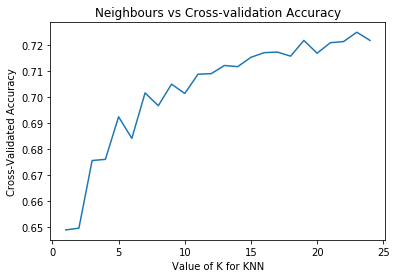

In [60]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Neighbours vs Cross-validation Accuracy')

We can see that increasing number of neighbours improves accuracy. However, we need to be wary of this as eventually accuracy falls.

### Decision Tree

In [61]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": range(1, 9),
              "min_samples_leaf": range(1, 9),
              "criterion": ["gini", "entropy"]}

for score, model_list,name in zip(scores_metric,comb_models,scoresname):
    '''Train cross-validation with 3 different loss functions. Then we store object into list and respective names.'''
    # Instantiate a Decision Tree classifier:
    tree = DecisionTreeClassifier()    
    # Instantiate the RandomizedSearchCV object:
    tree_cv = RandomizedSearchCV(tree,param_dist, cv=10, scoring=score, n_iter=10, random_state=5)
    treeopt = tree_cv.fit(x_train, y_train)
    treeopt = treeopt.fit(x_train, y_train)
    modelname.append('Decision Tree' + name)
    model_list.append(treeopt)

In [62]:
#Now constructing a graph for this
tree_range = range(2, 10)

# list of scores from t_range
t_scores = []
# 1. we will loop through reasonable values of k
for k in tree_range:
    # 2. run Decision tree with different value for depth of tree
    tree = DecisionTreeClassifier(max_depth = k, criterion='entropy', max_features = 8, max_leaf_nodes = None )
    # 3. obtain cross_val_score for Decision tree with depth of k
    scores = cross_val_score(tree, x_train, y_train, cv=10, scoring='accuracy')
    # 4. append mean of scores for decision tree to t_scores list
    t_scores.append(scores.mean())

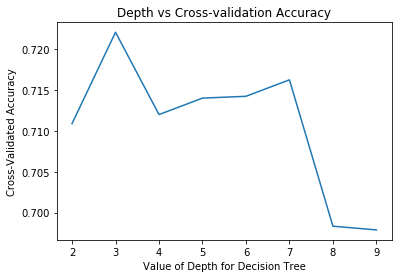

In [63]:
# plot the value of Depth for Decision Tree(x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(tree_range, t_scores)
plt.xlabel('Value of Depth for Decision Tree')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Depth vs Cross-validation Accuracy')

Similar interpretation to KNN graph.

### Random Forest

In [64]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"n_estimators": range(5,15),
              "max_depth": [3, None],
              "max_features": range(1, 9),
              "min_samples_split": range(2,5),
              "min_samples_leaf": range(1, 9),
              }

for score, model_list,name in zip(scores_metric,comb_models,scoresname):
    '''Train cross-validation with 3 different loss functions. Then we store object into list and respective names.'''
    # Instantiate a Extremely Random Forest classifier:
    randFor = RandomForestClassifier()
    # Instantiate the RandomizedSearchCV object:
    randFor_cv = RandomizedSearchCV(randFor,param_dist, cv=10, scoring=score, n_iter=10, random_state=5)
    optrand = randFor_cv.fit(x_train, y_train)
    optrand = optrand.fit(x_train, y_train)
    modelname.append('Random Forest' + name)
    model_list.append(optrand)

### Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegressionCV
#Logistic regression
for score, model_list,name in zip(scores_metric,comb_models,scoresname):
    '''Train cross-validation with 3 different loss functions. Then we store object into list and respective names.'''
    # Instantiate a logit model:
    logit = LogisticRegressionCV(cv=10, scoring=score)
    logit = logit.fit(x_train, y_train)
    modelname.append('Logit' + name)
    model_list.append(logit)

#Logistic regression with l1 pentalty
for score, model_list,name in zip(scores_metric,comb_models,scoresname):
    '''Train cross-validation with 3 different loss functions. Then we store object into list and respective names.'''
    # Instantiate a logit model:
    logit_l1 = LogisticRegressionCV(penalty='l1', solver='liblinear', cv=10, scoring=score)
    logit_l1 = logit_l1.fit(x_train, y_train)
    modelname.append('Logit L1' + name)
    model_list.append(logit_l1)

#Logistic regression with l2 pentalty
for score, model_list,name in zip(scores_metric,comb_models,scoresname):
    '''Train cross-validation with 3 different loss functions. Then we store object into list and respective names.'''
    # Instantiate a logit model:
    logit_l2 = LogisticRegressionCV(penalty='l2', solver='liblinear', cv=10, scoring=score)
    logit_l2 = logit_l2.fit(x_train, y_train)
    modelname.append('Logit L2' + name)
    model_list.append(logit_l2)

Now for some further models which we need not to worry about the hyperparameters.

In [66]:
#Naive Bayes
NaiveB = GaussianNB()
optnb = NaiveB.fit(x_train,y_train)
models.append(optnb)
modelname.append('Naive Bayes')

#Linear Discriminant analysis
LDA = LinearDiscriminantAnalysis()
optlda = LDA.fit(x_train,y_train)
models.append(optlda)
modelname.append('LDA')

#Quadratic Discriminant analysis
QDA = QuadraticDiscriminantAnalysis()
optqda = QDA.fit(x_train,y_train)
models.append(optqda)
modelname.append('QDA')

In [67]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, f1_score

def getResultTable2(rows, modelsUsed,model_num):
    '''Generates evaluation table depending on which type of models we are looking at.'''
    names = []
    #Retrieves which model we want to analyse based on the score function used to calculate it:
    if model_num ==1:
        names = rows[0:17:3] + rows[18::1]
    elif model_num ==2:
        names = rows[1:17:3]
    else:
        names = rows[2:17:3]
        
    #Create dataframe to store results:
    columns=['Overall Accuracy', 'Error Rate', 'SE', 'Sensitivity(TP)', 'Specificity(TN)', 
             'F-Measure', 'Profit', 'Profit Per Customer', 'CI for Profit U', 'CI for Profit L']
    results=pd.DataFrame(0.0, columns=columns, index=names)
    #Iterate through and compute predictions for models we are looking at:
    predictions = []
    for clf in modelsUsed:
        pred = clf.predict(x_test)
        predictions.append(pred) 
        
    for row,pred in zip(range(0,len(names)),predictions):
        matrix = confusion_matrix(y_test, pred)
        error_rate = 1 - (accuracy_score(y_test, pred))
        results.iloc[row,0] = (accuracy_score(y_test, pred))
        results.iloc[row,1] = error_rate
        se = np.sqrt(error_rate*(1- error_rate)/len(y_test))
        results.iloc[row,2] = se
        results.iloc[row,3] = (matrix[1][1]/(matrix[0][1]+matrix[1][1]))
        results.iloc[row,4] = (matrix[0][0]/(matrix[0][0]+matrix[1][0]))
        results.iloc[row,5] =  f1_score(y_test, pred)
        results.iloc[row,6] = (11.5*matrix[1][1]) - (14*matrix[1][0]) - (2.5*matrix[0][1])
        results.iloc[row,7] = ((11.5*matrix[1][1]) - (14*matrix[1][0]) - (2.5*matrix[0][1]))/y_test.shape[0]
        results.iloc[row,8] = (((11.5*matrix[1][1]) - (14*matrix[1][0]) - (2.5*matrix[0][1]))/y_test.shape[0])+(1.96*se)
        results.iloc[row,9] = (((11.5*matrix[1][1]) - (14*matrix[1][0]) - (2.5*matrix[0][1]))/y_test.shape[0])-(1.96*se)
    return results.round(3)

In [68]:
getResultTable2(modelname, models, 1)

,Overall Accuracy,Error Rate,SE,Sensitivity(TP),Specificity(TN),F-Measure,Profit,Profit Per Customer,CI for Profit U,CI for Profit L
KNN Accuracy,0.727,0.273,0.005,0.343,0.923,0.459,539.5,0.062,0.071,0.053
Decision Tree Accuracy,0.749,0.251,0.005,0.359,0.916,0.462,-554.5,-0.064,-0.055,-0.073
Random Forest Accuracy,0.733,0.267,0.005,0.354,0.932,0.477,1878.5,0.216,0.225,0.207
Logit Accuracy,0.757,0.243,0.005,0.382,0.937,0.505,2873.5,0.330,0.339,0.321
Logit L1 Accuracy,0.756,0.244,0.005,0.381,0.937,0.505,2915.0,0.335,0.344,0.326
Logit L2 Accuracy,0.756,0.244,0.005,0.381,0.937,0.504,2884.5,0.332,0.341,0.323
Naive Bayes,0.805,0.195,0.004,0.426,0.895,0.457,-4461.0,-0.513,-0.505,-0.521
LDA,0.749,0.251,0.005,0.377,0.944,0.508,3825.5,0.440,0.449,0.431
QDA,0.805,0.195,0.004,0.424,0.893,0.451,-4877.5,-0.561,-0.553,-0.569


In [69]:
getResultTable2(modelname, models_fn, 2)

,Overall Accuracy,Error Rate,SE,Sensitivity(TP),Specificity(TN),F-Measure,Profit,Profit Per Customer,CI for Profit U,CI for Profit L
KNN FN_loss,0.727,0.273,0.005,0.343,0.923,0.459,539.5,0.062,0.071,0.053
Decision Tree FN_loss,0.629,0.371,0.005,0.282,0.935,0.416,1678.0,0.193,0.203,0.183
Random Forest FN_loss,0.743,0.257,0.005,0.365,0.934,0.488,2239.0,0.257,0.267,0.248
Logit FN_loss,0.757,0.243,0.005,0.382,0.937,0.505,2873.5,0.330,0.339,0.321
Logit L1 FN_loss,0.721,0.279,0.005,0.351,0.946,0.488,3839.0,0.441,0.451,0.432
Logit L2 FN_loss,0.757,0.243,0.005,0.383,0.937,0.506,2919.5,0.336,0.345,0.327


In [70]:
getResultTable2(modelname, models_tp, 3)

,Overall Accuracy,Error Rate,SE,Sensitivity(TP),Specificity(TN),F-Measure,Profit,Profit Per Customer,CI for Profit U,CI for Profit L
KNN tp_score,0.727,0.273,0.005,0.343,0.923,0.459,539.5,0.062,0.071,0.053
Decision Tree tp_score,0.612,0.388,0.005,0.286,0.961,0.432,4492.5,0.517,0.527,0.506
Random Forest tp_score,0.731,0.269,0.005,0.352,0.931,0.475,1838.5,0.211,0.221,0.202
Logit tp_score,0.757,0.243,0.005,0.382,0.937,0.505,2873.5,0.330,0.339,0.321
Logit L1 tp_score,0.721,0.279,0.005,0.351,0.945,0.488,3813.5,0.439,0.448,0.429


# Evaluation

From this, the best 2 models were:

Recall that our Cost/Benefit values (express in terms of cost):

True Negative: 0 since we don't send anything to a customer who would have bought something otherwise.

True Positive: -14 + 2.5 = -11.5 (profit is negative cost. Thus, we have profit and cost to send mail)

False Negative: 14 (Lost profit and therefore don't make money).

False Positive: 2.5

We have models that made profit! Yay!